<center>

# DESCRIPTIVE ANALYSIS

</center>

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import json

## Import data

In [2]:
total_data = pd.read_csv("../data/raw/crime_query.csv")
total_data.head(5)

,date_occ,time_occ,area_name,rpt_dist_no,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon
0,2020-01-08T00:00:00.000,2230,Southwest,377,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,2020-01-01T00:00:00.000,330,Central,163,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,2020-02-13T00:00:00.000,1200,Central,155,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,POLICE FACILITY,NaN,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,2020-01-01T00:00:00.000,1730,N Hollywood,1543,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,2020-01-01T00:00:00.000,415,Mission,1998,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,NaN,Invest Cont,14400 TITUS ST,34.2198,-118.4468


In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606984 entries, 0 to 606983
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date_occ      606984 non-null  object 
 1   time_occ      606984 non-null  int64  
 2   area_name     606984 non-null  object 
 3   rpt_dist_no   606984 non-null  int64  
 4   crm_cd_desc   606984 non-null  object 
 5   mocodes       522665 non-null  object 
 6   vict_age      606984 non-null  int64  
 7   vict_sex      526671 non-null  object 
 8   vict_descent  526664 non-null  object 
 9   premis_desc   606516 non-null  object 
 10  weapon_desc   212782 non-null  object 
 11  status_desc   606984 non-null  object 
 12  location      606984 non-null  object 
 13  lat           606984 non-null  float64
 14  lon           606984 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage: 69.5+ MB


-Before the query, there are a total of 606.984 rows.

-Some of the variables have null values.

-The data has: 4 numerical characteristics, 9 categorical characteristics and 2 datetime characteristics (which need to be converted to datetime format).

In [4]:
# Count duplicate rows
duplicate_count = total_data.duplicated().sum()
duplicate_count

173048

In [5]:
# Remove duplicate rows
total_data.drop_duplicates(inplace= True)
total_data.shape

(433936, 15)

In [6]:
# Change the data type of date_occ to datetime
total_data["date_occ"] = pd.to_datetime(total_data["date_occ"]).dt.date 
total_data["date_occ"] = pd.to_datetime(total_data["date_occ"])

total_data.head(5)

,date_occ,time_occ,area_name,rpt_dist_no,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon
0,2020-01-08,2230,Southwest,377,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,2020-01-01,330,Central,163,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,2020-02-13,1200,Central,155,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,POLICE FACILITY,NaN,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,2020-01-01,1730,N Hollywood,1543,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,2020-01-01,415,Mission,1998,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,NaN,Invest Cont,14400 TITUS ST,34.2198,-118.4468


In [7]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433936 entries, 0 to 606983
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      433936 non-null  datetime64[ns]
 1   time_occ      433936 non-null  int64         
 2   area_name     433936 non-null  object        
 3   rpt_dist_no   433936 non-null  int64         
 4   crm_cd_desc   433936 non-null  object        
 5   mocodes       374863 non-null  object        
 6   vict_age      433936 non-null  int64         
 7   vict_sex      377464 non-null  object        
 8   vict_descent  377461 non-null  object        
 9   premis_desc   433651 non-null  object        
 10  weapon_desc   154873 non-null  object        
 11  status_desc   433936 non-null  object        
 12  location      433936 non-null  object        
 13  lat           433936 non-null  float64       
 14  lon           433936 non-null  float64       
dtypes: datetime64[ns](1), 

In [8]:
# List of date columns
date_columns = total_data.select_dtypes(include=["datetime"])

# List of categorical columns
categorical_columns = total_data.select_dtypes(include=["object", "bool"])

# List of numerical columns
numerical_columns = total_data.select_dtypes(include=["int", "float"])

In [9]:
total_data.describe()

,date_occ,time_occ,rpt_dist_no,vict_age,lat,lon
count,433936,433936.000000,433936.000000,433936.000000,433936.000000,433936.000000
mean,2022-07-26 18:39:10.068212480,1342.261801,807.326440,29.243091,33.978735,-118.063061
min,2020-01-01 00:00:00,1.000000,101.000000,0.000000,0.000000,-118.667600
25%,2021-08-12 00:00:00,900.000000,327.000000,0.000000,34.023400,-118.376600
50%,2023-01-16 00:00:00,1427.000000,644.000000,30.000000,34.051200,-118.296000
75%,2023-07-10 00:00:00,1900.000000,1203.000000,44.000000,34.098100,-118.260900
max,2023-12-31 00:00:00,2359.000000,2198.000000,99.000000,34.328900,0.000000
std,NaN,653.305824,582.410313,21.737410,1.613498,5.594830


## Measures of central tendency

In [10]:
# Calculation of means of numerical columns
means = numerical_columns.mean()
means

time_occ       1342.261801
rpt_dist_no     807.326440
vict_age         29.243091
lat              33.978735
lon            -118.063061
dtype: float64

In [11]:
# Calculation of medians of numerical columns
numerical_medians = numerical_columns.median()

# Calculation of medians of date columns
date_medians = date_columns.median()

# Concatenation of all medians
medians = pd.concat([numerical_medians, date_medians])
medians

time_occ                    1427.0
rpt_dist_no                  644.0
vict_age                      30.0
lat                        34.0512
lon                       -118.296
date_occ       2023-01-16 00:00:00
dtype: object

In [12]:
# Calculation of  all modes
modes = total_data.mode().iloc[0]
modes

date_occ                                   2023-01-01 00:00:00
time_occ                                                  1200
area_name                                              Central
rpt_dist_no                                                162
crm_cd_desc                                   VEHICLE - STOLEN
mocodes                                                   0344
vict_age                                                     0
vict_sex                                                     M
vict_descent                                                 H
premis_desc                                             STREET
weapon_desc     STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
status_desc                                        Invest Cont
location                800 N  ALAMEDA                      ST
lat                                                    34.1016
lon                                                  -118.3089
Name: 0, dtype: object

## Measures of dispersion

In [13]:
# Calculation of ranks of numerical columns
numerical_ranks = numerical_columns.max() - numerical_columns.min()

# Calculation of ranks of date columns
date_ranks = date_columns.max() - date_columns.min()

# Concatenation of all ranks
ranks = pd.concat([numerical_ranks, date_ranks])
ranks

time_occ                   2358.0
rpt_dist_no                2097.0
vict_age                     99.0
lat                       34.3289
lon                      118.6676
date_occ       1460 days 00:00:00
dtype: object

In [14]:
# Calculation of variances of numerical columns
variances = numerical_columns.var()
variances

time_occ       426808.500289
rpt_dist_no    339201.772267
vict_age          472.514997
lat                 2.603376
lon                31.302123
dtype: float64

In [15]:
# Calculation of numerical of numerical columns
stds = numerical_columns.std()
stds

time_occ       653.305824
rpt_dist_no    582.410313
vict_age        21.737410
lat              1.613498
lon              5.594830
dtype: float64

In [16]:
# Create a dictionary with the measures
resultados = {
    'mean_per_column': means.to_dict(),
    'median_per_column': medians.to_dict(),
    'mode_per_column': modes.to_dict(),
    'ranks_per_column': ranks.to_dict(),
    'variances_per_column': variances.to_dict(),
    'stds_per_column': stds.to_dict()
}

In [17]:
# Convert results to JSON format with indentation
resultados_json = pd.Series(resultados).to_json(indent=2)

# Write the JSON data to a file
with open('../data/interim/stats.json', 'w') as file:
    file.write(resultados_json)

In [18]:
# Save dataset
total_data.to_csv("../data/interim/eda_data.csv",index=False)

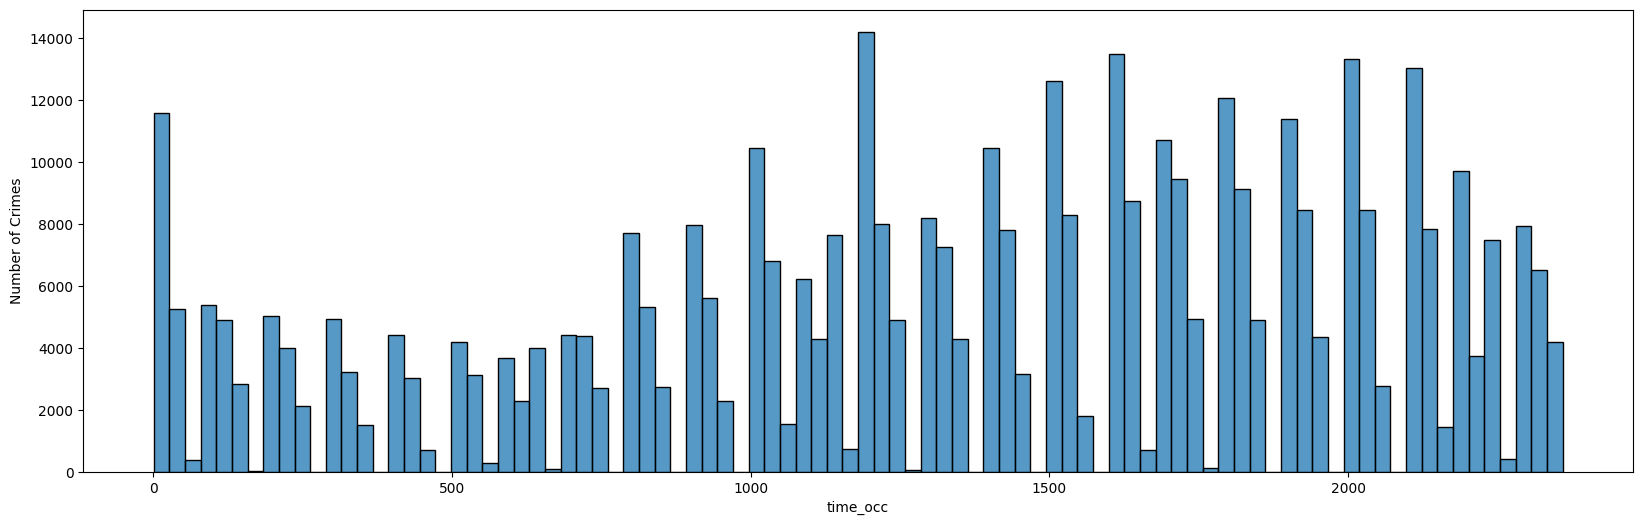

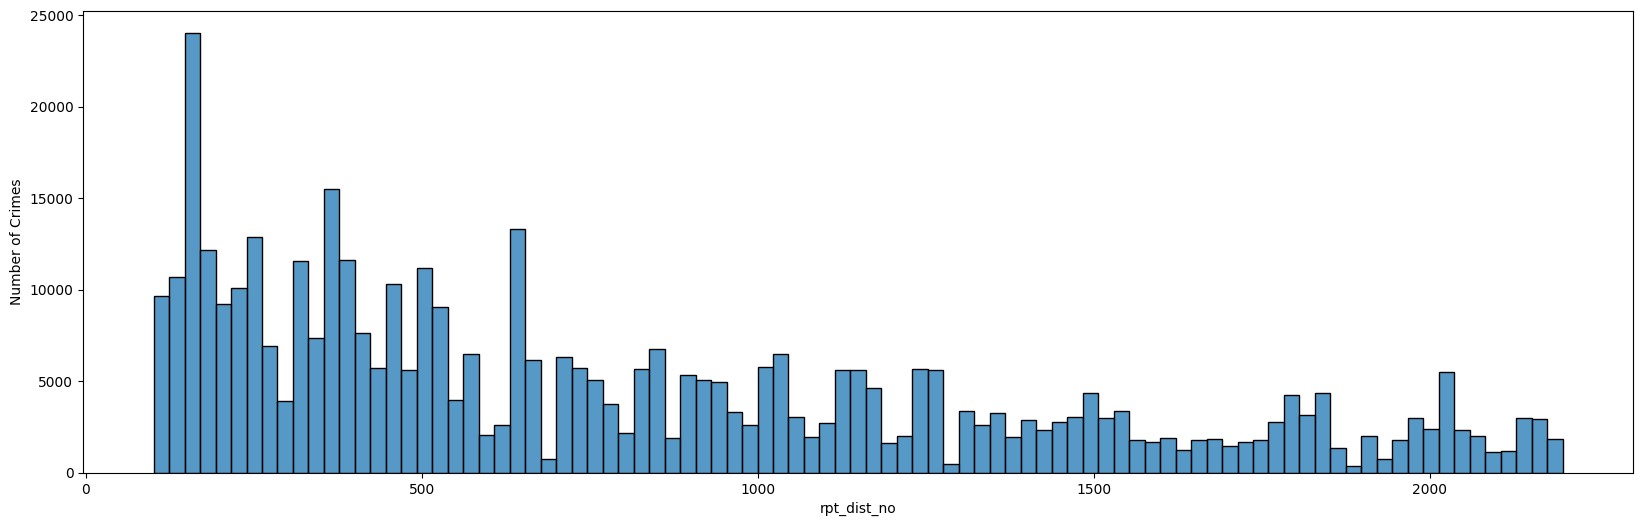

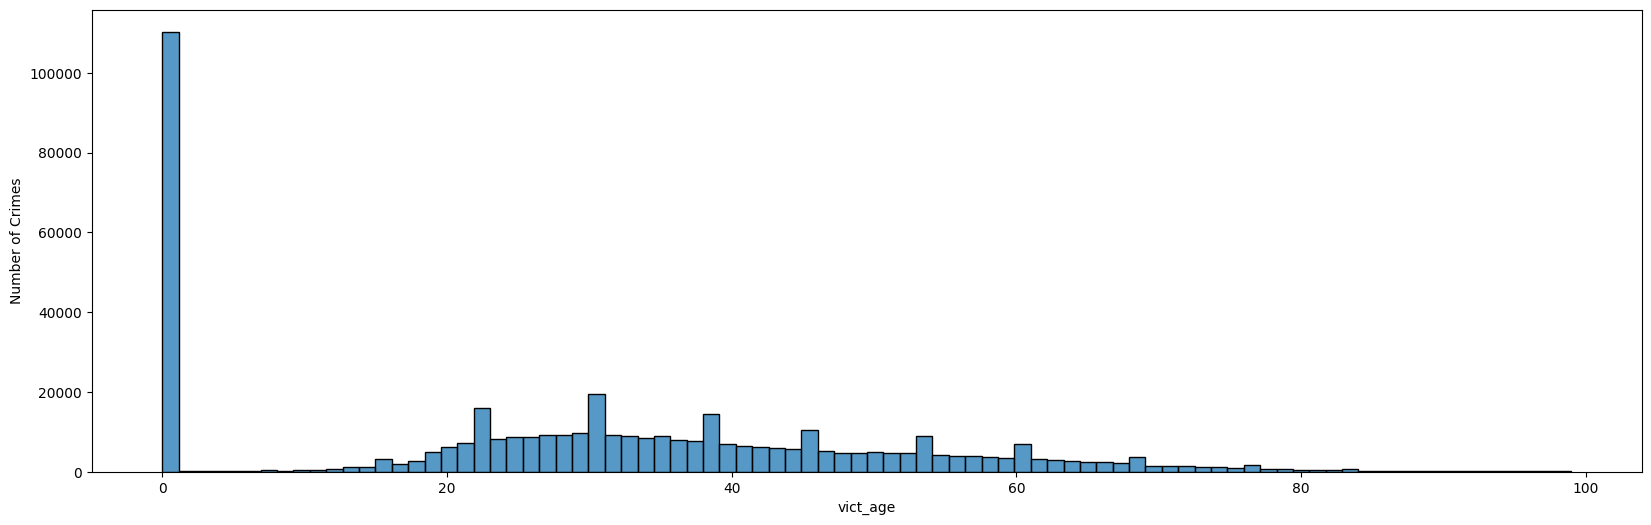

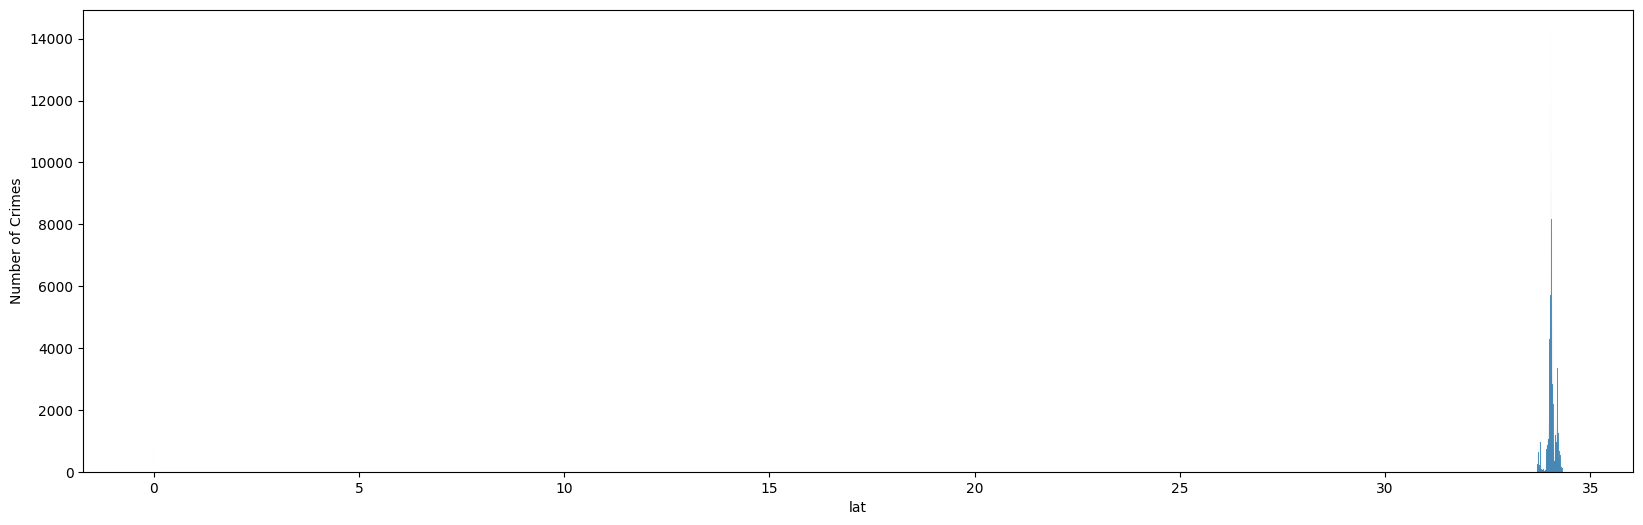

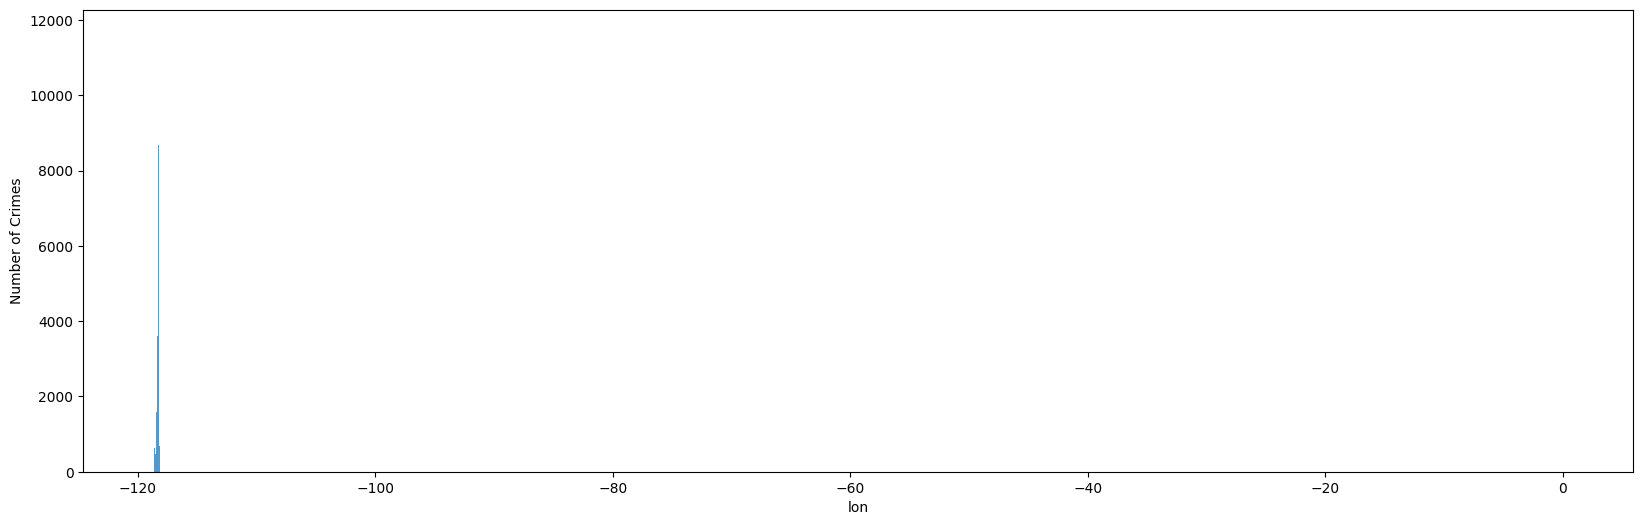

In [19]:
# Numerical Variables Histograms
for i in numerical_columns.columns:
    plt.figure(figsize=(20, 6))
    sns.histplot(numerical_columns[i], edgecolor='black')
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('Number of Crimes')
    plt.show

The analysis has provided us with an initial assessment of the variables. Upon examining the graphs, we can conclude that there is an asymmetric distribution in the variables. 

Additionally, we observed anomalous values in the variables of age, latitude, and longitude. These anomalous values could be attributed to errors during the recording of crimes; therefore, we need to handle them during the EDA.